In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

In [6]:
DATA_DIR = '../../pickles'

In [11]:
df = pd.read_pickle(os.path.join(DATA_DIR, 'station1_pm_normalized.pkl'))
df.head(10)

,date,ref,PM_6182,PM_6179,PM_617B,PM25_6182,PM25_6179,PM25_617B,rh,t_grad,pressure,temp,pluvio
15,2017-09-28 14:00:00,16.2,-1.179450,-1.139344,-1.135621,-1.184033,-1.129486,-1.149095,-1.118787,-0.921348,0.312759,1.982213,0.0
16,2017-09-28 14:15:00,9.6,-1.109019,-1.086416,-1.122920,-1.102387,-1.072487,-1.129116,-1.127870,-0.976013,0.331953,2.052982,0.0
17,2017-09-28 14:30:00,10.3,-1.179450,-1.171101,-1.258406,-1.177752,-1.169386,-1.253987,-1.236869,-1.085343,0.312759,2.076572,0.0
18,2017-09-28 14:45:00,9.4,-1.138365,-1.001731,-1.207599,-1.140070,-1.009787,-1.224018,-1.264119,-0.812018,0.312759,2.005803,0.0
19,2017-09-28 15:00:00,10.7,-1.167711,-1.165808,-1.139855,-1.165191,-1.169386,-1.149095,-1.146036,-0.921348,0.312759,1.864265,0.0
20,2017-09-28 15:15:00,10.7,-1.167711,-1.202857,-1.038241,-1.158911,-1.197885,-1.039208,-1.055204,-0.866683,0.312759,1.746317,0.0
21,2017-09-28 15:30:00,9.6,-1.079673,-1.171101,-1.008603,-1.070985,-1.163686,-0.999249,-0.964371,-0.812018,0.312759,1.651959,0.0
22,2017-09-28 15:45:00,10.2,-1.032720,-1.134051,-0.995901,-1.033302,-1.123786,-0.989259,-0.891705,-0.757353,0.312759,1.581190,0.0
23,2017-09-28 16:00:00,9.8,-1.044458,-1.097001,-0.911222,-1.039583,-1.095286,-0.919331,-0.855372,-0.757353,0.312759,1.534011,0.0
24,2017-09-28 16:15:00,8.9,-1.044458,-1.044073,-1.182195,-1.039583,-1.038287,-1.174070,-0.855372,-0.702688,0.331953,1.486832,0.0


In [12]:
def from_dataframe_to_xy(df):
    return (np.array(df[['PM_6182', 'PM_6179', 'PM_617B', 'PM25_6182', 'PM25_6179', 'PM25_617B', 'temp', 'rh', 't_grad', 'pressure', 'pluvio']]),
            np.array(df['ref']))

def split_dataframe(dataframe, percent):
    nb_rows = int(np.floor(percent * len(dataframe)))
    return dataframe[:nb_rows], dataframe[nb_rows:]

In [13]:
def mlp(input_shape, loss='mse', optimizer='adam'):
    model = Sequential()

    model.add(Dense(32, input_dim=input_shape, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    opti = Adam(lr=0.0003)
    model.compile(loss=loss, optimizer=opti)
    return model

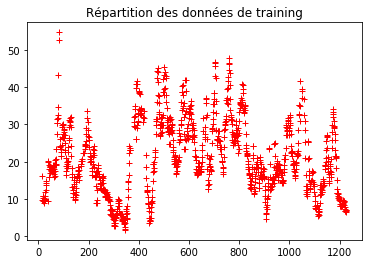

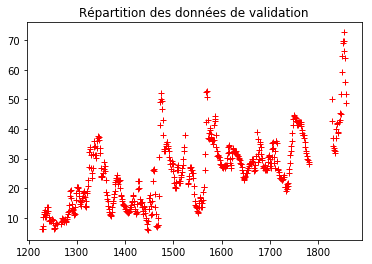

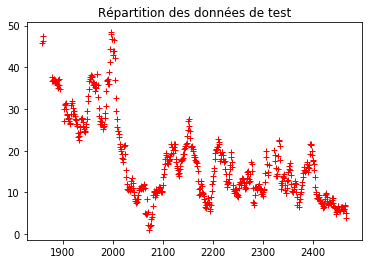

In [14]:
df_train, df_test = split_dataframe(df, 0.5)
df_valid, df_test = split_dataframe(df_test, 0.5)

X_train, y_train = from_dataframe_to_xy(df_train)
X_valid, y_valid = from_dataframe_to_xy(df_valid)
X_test, y_test = from_dataframe_to_xy(df_test)

plt.plot(df_train['ref'], '+r')
plt.title('Répartition des données de training')
plt.show()

plt.plot(df_valid['ref'], '+r')
plt.title('Répartition des données de validation')
plt.show()

plt.plot(df_test['ref'], '+r')
plt.title('Répartition des données de test')
plt.show()

In [15]:
model = mlp(X_train.shape[1])
early_stopping = EarlyStopping(patience=10)
history = model.fit(X_train, y_train, \
                    batch_size=32, \
                    epochs=1000, \
                    validation_data=(X_valid, y_valid), \
                    callbacks=[early_stopping])

Train on 1133 samples, validate on 567 samples
Epoch 1/1000
1133/1133 [==============================] - 0s 316us/step - loss: 534.5641 - val_loss: 775.1540
Epoch 2/1000
1133/1133 [==============================] - 0s 41us/step - loss: 532.0661 - val_loss: 771.8396
Epoch 3/1000
1133/1133 [==============================] - 0s 40us/step - loss: 528.9860 - val_loss: 767.5192
Epoch 4/1000
1133/1133 [==============================] - 0s 39us/step - loss: 524.8701 - val_loss: 761.8837
Epoch 5/1000
1133/1133 [==============================] - 0s 42us/step - loss: 519.5270 - val_loss: 754.5566
Epoch 6/1000
1133/1133 [==============================] - 0s 43us/step - loss: 512.5876 - val_loss: 745.3915
Epoch 7/1000
1133/1133 [==============================] - 0s 42us/step - loss: 503.8688 - val_loss: 733.9688
Epoch 8/1000
1133/1133 [==============================] - 0s 43us/step - loss: 493.3489 - val_loss: 720.6156
Epoch 9/1000
1133/1133 [==============================] - 0s 42us/step - loss: 4

1133/1133 [==============================] - 0s 35us/step - loss: 73.0390 - val_loss: 211.5539
Epoch 75/1000
1133/1133 [==============================] - 0s 37us/step - loss: 72.1013 - val_loss: 210.3059
Epoch 76/1000
1133/1133 [==============================] - 0s 35us/step - loss: 71.1474 - val_loss: 208.5700
Epoch 77/1000
1133/1133 [==============================] - 0s 34us/step - loss: 70.2399 - val_loss: 206.8034
Epoch 78/1000
1133/1133 [==============================] - 0s 35us/step - loss: 69.3376 - val_loss: 205.6307
Epoch 79/1000
1133/1133 [==============================] - 0s 35us/step - loss: 68.4664 - val_loss: 203.9507
Epoch 80/1000
1133/1133 [==============================] - 0s 34us/step - loss: 67.6451 - val_loss: 202.6900
Epoch 81/1000
1133/1133 [==============================] - 0s 34us/step - loss: 66.7885 - val_loss: 201.5354
Epoch 82/1000
1133/1133 [==============================] - 0s 36us/step - loss: 65.9939 - val_loss: 199.9149
Epoch 83/1000
1133/1133 [========

1133/1133 [==============================] - 0s 34us/step - loss: 42.8587 - val_loss: 147.6329
Epoch 149/1000
1133/1133 [==============================] - 0s 35us/step - loss: 42.7442 - val_loss: 147.3498
Epoch 150/1000
1133/1133 [==============================] - 0s 34us/step - loss: 42.6806 - val_loss: 146.8513
Epoch 151/1000
1133/1133 [==============================] - 0s 33us/step - loss: 42.5899 - val_loss: 146.1285
Epoch 152/1000
1133/1133 [==============================] - 0s 34us/step - loss: 42.5091 - val_loss: 145.7026
Epoch 153/1000
1133/1133 [==============================] - 0s 34us/step - loss: 42.4499 - val_loss: 145.4036
Epoch 154/1000
1133/1133 [==============================] - 0s 35us/step - loss: 42.3502 - val_loss: 145.2980
Epoch 155/1000
1133/1133 [==============================] - 0s 39us/step - loss: 42.2542 - val_loss: 144.5940
Epoch 156/1000
1133/1133 [==============================] - 0s 33us/step - loss: 42.1969 - val_loss: 144.2748
Epoch 157/1000
1133/1133 

1133/1133 [==============================] - 0s 35us/step - loss: 39.4158 - val_loss: 130.2418
Epoch 223/1000
1133/1133 [==============================] - 0s 35us/step - loss: 39.3904 - val_loss: 130.0189
Epoch 224/1000
1133/1133 [==============================] - 0s 34us/step - loss: 39.3860 - val_loss: 129.6442
Epoch 225/1000
1133/1133 [==============================] - 0s 34us/step - loss: 39.3373 - val_loss: 129.9519
Epoch 226/1000
1133/1133 [==============================] - 0s 34us/step - loss: 39.3178 - val_loss: 129.7375
Epoch 227/1000
1133/1133 [==============================] - 0s 33us/step - loss: 39.3153 - val_loss: 129.9775
Epoch 228/1000
1133/1133 [==============================] - 0s 39us/step - loss: 39.3028 - val_loss: 129.5262
Epoch 229/1000
1133/1133 [==============================] - 0s 40us/step - loss: 39.2533 - val_loss: 129.3611
Epoch 230/1000
1133/1133 [==============================] - 0s 38us/step - loss: 39.2299 - val_loss: 128.5392
Epoch 231/1000
1133/1133 

In [16]:
model.evaluate(X_test, y_test, verbose=0)

178.5292980187364

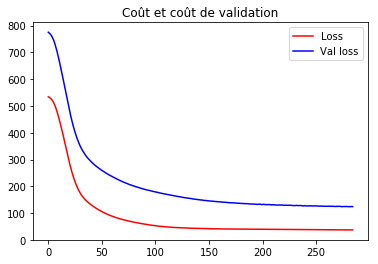

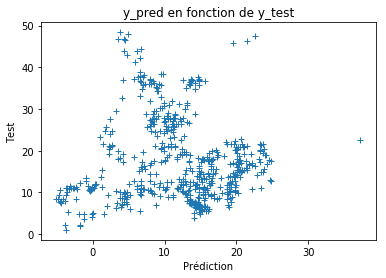

In [17]:
y_pred = model.predict(X_test)
plt.title('Coût et coût de validation')
line1,=plt.plot(history.history['loss'], label="Loss", linestyle='-', color='r')
line2,=plt.plot(history.history['val_loss'], label="Val loss", linestyle='-', color='b')
first_legend = plt.legend(handles=[line1, line2], loc=1)

plt.show()

plt.title('y_pred en fonction de y_test')

plt.plot(y_pred[:], y_test[:], '+')
plt.ylabel('Test')
plt.xlabel('Prédiction')
plt.show()